## Author: Mohsin Raza

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [42]:
terror_df = pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

C:\Users\sande\Anaconda3\envs\root\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [43]:
terror_df=terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [44]:
terror_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,NaN,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN
4,1970,1,0,Japan,NaN,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [45]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state           14502
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            636
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
dtype: int64

In [46]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 18 columns):
Year           170350 non-null int64
Month          170350 non-null int64
Day            170350 non-null int64
Country        170350 non-null object
state          155848 non-null object
Region         170350 non-null object
city           169904 non-null object
latitude       165744 non-null float64
longitude      165744 non-null float64
AttackType     170350 non-null object
Killed         160668 non-null float64
Wounded        155025 non-null float64
Target         169714 non-null object
Summary        104212 non-null object
Group          170350 non-null object
Target_type    170350 non-null object
Weapon_type    170350 non-null object
Motive         48586 non-null object
dtypes: float64(4), int64(3), object(11)
memory usage: 23.4+ MB


### DESTRUCTIVE FEATURES

In [47]:
print("Country with the most attacks:",terror_df['Country'].value_counts().idxmax())
print("City with the most attacks:",terror_df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",terror_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror_df['Group'].value_counts().index[1])
print("Most Attack Types:",terror_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# Terrorist Activities by Region in each Year through Area Plot

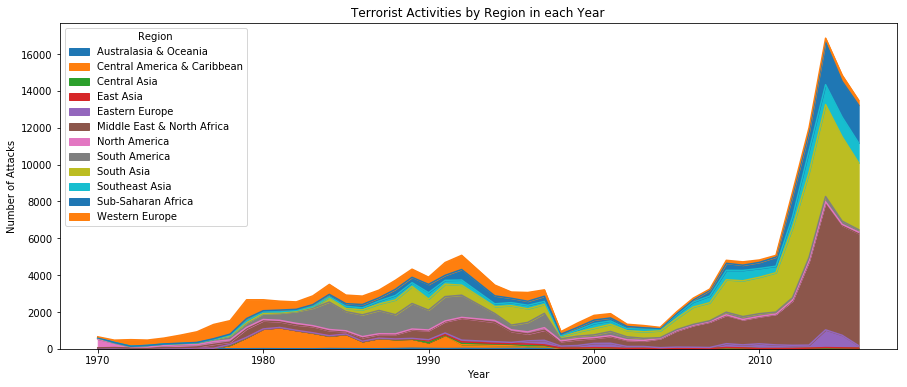

In [48]:
pd.crosstab(terror_df.Year, terror_df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Number of Terrorist Activities each Year

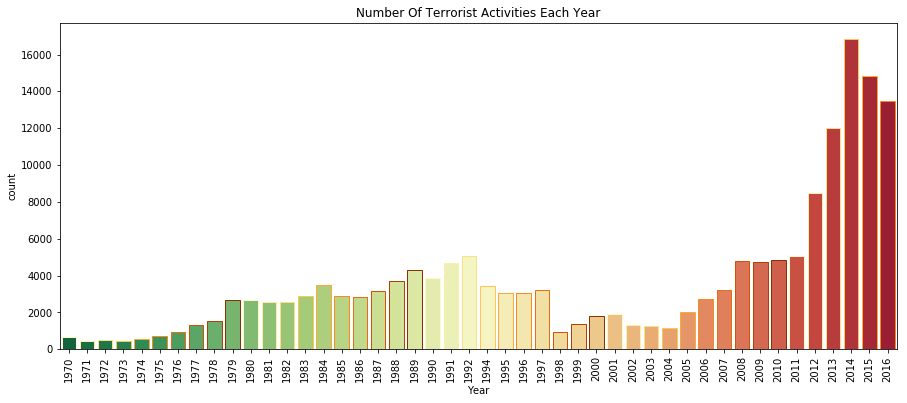

In [49]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

# History of the Worst Terror Attacks in Heatmap using Plotly

In [50]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_df['casualities'] = terror_df['Killed'] + terror_df['Wounded']

## Values are sorted by the top 40 worst terror attacks as to keep the heatmap simple and easy to visualize

In [9]:
terror_df1 = terror_df.sort_values(by='casualities',ascending=False)[:40]

In [51]:
heat=terror_df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [52]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.as_matrix(), x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [53]:
terror_df.Country.value_counts()[:15]

Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Thailand           3668
Somalia            3482
Nigeria            3418
Spain              3245
Yemen              3109
Name: Country, dtype: int64

# Top Countries affected by Terror Attacks

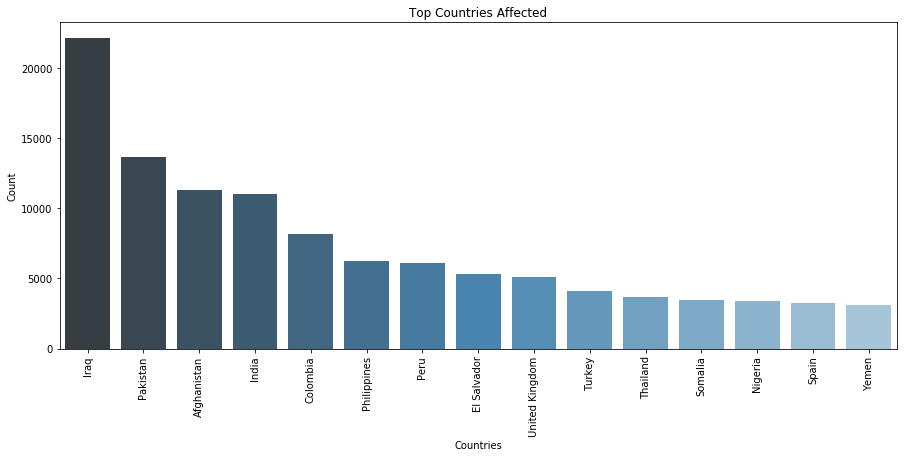

In [54]:
plt.subplots(figsize=(15,6))
sns.barplot(terror_df['Country'].value_counts()[:15].index,terror_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# The Big Four

## Now to visualize the top four countries that have suffered the most using bubble charts in Plotly

In [55]:
terror_bubble_df = terror_df[(terror_df['Group'] != 'Unknown') & (terror_df['casualities'] > 50)]
terror_bubble_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
1199,1972,3,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.597269,-5.930109,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives/Bombs/Dynamite,NaN,132
1313,1972,5,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1716,1973,3,8,United Kingdom,England,Western Europe,London,51.500152,-0.126236,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives/Bombs/Dynamite,NaN,239
1899,1973,8,5,Greece,Attica,Western Europe,Athens,37.979180,23.716647,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2065,1973,12,17,Italy,Lazio,Western Europe,Rome,41.890520,12.494249,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [56]:
terror_bubble_df = terror_bubble_df.sort_values(['Region', 'Country'])

## It is best to always check for null values and drop the features that are not needed. Atleast it can execute much faster

In [57]:
terror_bubble_df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
state          105
Region           0
city             1
latitude        62
longitude       62
AttackType       0
Killed           0
Wounded          0
Target           9
Summary        518
Group            0
Target_type      0
Weapon_type      0
Motive         960
casualities      0
dtype: int64

In [58]:
terror_bubble_df = terror_bubble_df.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [59]:
terror_bubble_df = terror_bubble_df.dropna(subset=['city'])

In [60]:
terror_bubble_df.isnull().sum()

Year             0
Month            0
Day              0
Country          0
state          105
Region           0
city             0
AttackType       0
Killed           0
Wounded          0
Group            0
Target_type      0
Weapon_type      0
casualities      0
dtype: int64

# Iraq, Pakistan, Afghanistan and India have suffered the most number of terror attacks. So here I have used an Interactive Bubble chart to highlight their timeline with details like City, Terrorist Group, Number of Casualities and Year. And ofcourse, I have used the bubble size according to the casualities suffered

In [61]:
hover_text = []
for index, row in terror_bubble_df.iterrows():
    hover_text.append(('City: {city}<br>'+
                      'Group: {group}<br>'+
                      'casualities: {casualities}<br>'+
                      'Year: {year}').format(city=row['city'],
                                            group=row['Group'],
                                            casualities=row['casualities'],
                                            year=row['Year']))
terror_bubble_df['text'] = hover_text

In [63]:
trace0 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Iraq'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
    mode='markers',
    name='Iraq',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Iraq'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Iraq'],
        line=dict(
            width=2
        ),
    )
)
trace1 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Pakistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
    mode='markers',
    name='Pakistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Pakistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Pakistan'],
        line=dict(
            width=2
        ),
    )
)
trace2 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'Afghanistan'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],
    mode='markers',
    name='Afghanistan',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'Afghanistan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'Afghanistan'],
        line=dict(
            width=2
        ),
    )
)
trace3 = go.Scatter(
    x=terror_bubble_df['Year'][terror_bubble_df['Country'] == 'India'],
    y=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
    mode='markers',
    name='India',
    text=terror_bubble_df['text'][terror_bubble_df['Country'] == 'India'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terror_bubble_df['casualities'][terror_bubble_df['Country'] == 'India'],
        line=dict(
            width=2
        ),
    )
)

In [64]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'The Big Four',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Casualities',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

In [65]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Terrorism Bubble')

## Now let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [66]:
terror_df.Group.value_counts()[1:15]

Taliban                                             6575
Shining Path (SL)                                   4551
Islamic State of Iraq and the Levant (ISIL)         4287
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          2683
Irish Republican Army (IRA)                         2669
Revolutionary Armed Forces of Colombia (FARC)       2481
New People's Army (NPA)                             2414
Kurdistan Workers' Party (PKK)                      2152
Boko Haram                                          2077
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1766
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1483
Name: Group, dtype: int64

In [67]:
test = terror_df[terror_df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [68]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Iraq', 'Turkey', 'Syria', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia'], dtype=object)

# Now let us plot the presence of these terrorist organizations on a world map using Folium. Through this, we would be able to know the organizations that have carried out their operations on some of the countries

In [69]:
import folium
from folium.plugins import MarkerCluster

In [70]:
terror_df_group = terror_df.dropna(subset=['latitude','longitude'])

## It makes sense now to have only unique rows of Country and Group as multiple groups can operate on a single Country. But it is highly unlikely in most of the countries. But still there are exceptions.

In [71]:
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group'])

## We now use only the top 8 terrorist organizations sorted based on the number of attacks worldwide for the sake of rendering.

In [72]:
terrorist_groups = terror_df.Group.value_counts()[1:8].index.tolist()

In [73]:
terror_df_group = terror_df_group.loc[terror_df_group.Group.isin(terrorist_groups)]

In [74]:
terror_df_group.Group.unique()

array(['Irish Republican Army (IRA)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Taliban',
       'Al-Shabaab', 'Islamic State of Iraq and the Levant (ISIL)'], dtype=object)

In [75]:
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'], 
                  terror_df_group.iloc[i]['Country'])).add_to(m)
 # Save it as html
m.save('Terrorist_Organizations_in_Country.html')

In [76]:
m

# The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive

In [77]:
m1 = folium.Map(location=[20, 0], tiles="Stamenterrain", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terror_df_group)):
    marker=folium.Marker([terror_df_group.iloc[i]['latitude'],terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group'],
                                          terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)
m1.save('Terrorist_Organizations_in_Country_cluster.html')

## The Layer Control at the top right corner makes it easy to use any kind of Map Tile.

In [78]:
m1

## A Choropleth map of the countries that have suffered the most casualities from 1970 to 2016

In [79]:
import json
import os
world_geo = os.path.join('C:/Users/sande/Desktop/Machine Learning A-Z Template/notebooks','world-countries.json')

In [80]:
terror_df_world = terror_df[['Country','casualities']]

In [81]:
terror_df_world = terror_df_world.groupby(['Country'])['casualities'].sum().sort_values(ascending=False) \
.reset_index()

In [82]:
terror_df_world.head()

,Country,casualities
0,Iraq,200519
1,Afghanistan,71374
2,Pakistan,62659
3,India,47083
4,Sri Lanka,31086


In [83]:
m2 = folium.Map(location=[0, 0],zoom_start=2,tiles='Mapbox Bright')

In [84]:
m2.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=terror_df_world,
    columns=['Country','casualities'],
    key_on='feature.properties.name',
    threshold_scale=[0,8000, 21000, 48000, 75000, 200600],
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Casualities in Numbers from 1970 to 2016'
)
folium.LayerControl().add_to(m2)
 
# Save to html
m2.save('chloropleth_world.html')

In [85]:
m2